# Метод прогонки для трехдиагональных матриц и матриц с большим числом диагоналей

Основные идеи:

1. Компактность хранения. Если матрица из N строк имеет K диагоналей, то её можно хранить в массиве размера (N, K). Отсюда следует специфичность индексации и формирования массива.
    
2. Прогонка - это тоже самое, что метод Гаусса, только исключать i-ю неизвестную нужно из малого числа строк (при одной поддиагонали - только из одной следующей строки).

А.А.Самарский, Е.С.Николаев "Методы решений сеточных уравнений", "Наука", М.:1978
стр. 76

In [8]:
import math
import numpy as np
np.set_printoptions(precision=5, suppress=True)
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:60% !important; }</style>"))

# Решение для полной матрицы с одной поддиагональю

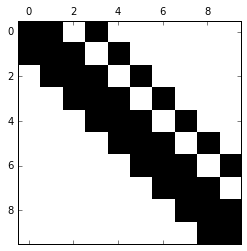

In [10]:
N = 10
A = np.float64(np.diag([1000]*N) + np.diag([1]*(N-1), 1) + np.diag([1]*(N-1), -1) + np.diag([1]*(N-3), 3))
plt.spy(A)

In [11]:
b = np.float64(np.array(range(1,N+1))[:,np.newaxis])
b.T

array([[  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]])

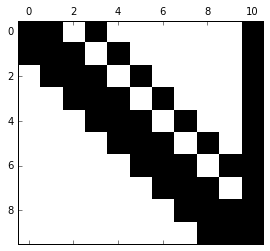

In [12]:
B = np.hstack((A.copy(), b.copy()))
plt.spy(B)

[[ 1.       0.001    0.       0.001    0.       0.       0.       0.       0.
   0.       0.001  ]
 [ 0.       1.       0.001   -0.       0.001    0.       0.       0.       0.
   0.       0.002  ]
 [ 0.       0.       1.       0.001   -0.       0.001    0.       0.       0.
   0.       0.003  ]
 [ 0.       0.       0.       1.       0.001   -0.       0.001    0.       0.
   0.       0.004  ]
 [ 0.       0.       0.       0.       1.       0.001   -0.       0.001    0.
   0.       0.005  ]
 [ 0.       0.       0.       0.       0.       1.       0.001   -0.       0.001
   0.       0.006  ]
 [ 0.       0.       0.       0.       0.       0.       1.       0.001   -0.
   0.001    0.00699]
 [ 0.       0.       0.       0.       0.       0.       0.       1.       0.001
  -0.       0.00799]
 [ 0.       0.       0.       0.       0.       0.       0.       0.       1.
   0.001    0.00899]
 [ 0.       0.       0.       0.       0.       0.       0.       0.       0.
   1.       0.00999]]


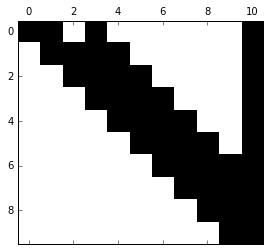

In [13]:
# прямой ход метода прогонки в случае с одной поддиагональю и любым числом наддиагоналей
for i in range(N):
    B[i] = B[i] / B[i, i] # разделить i-ю строку на диагональный элемент
    if (i+1 < N):
        B[i+1] -= B[i] * B[i+1, i] # вычесть из следующей строки i-ю, умноженную на поддиагональный элемент
plt.spy(B)
print(B)

In [14]:
# обратный ход
x = np.zeros((N, 1))
x[N-1] = B[N-1,N] # вычисление последнего неизвестного
for j in range(N-2,-1,-1):
    l = min([N-j, ovrK+1])
    x[j] = (B[j,N] - np.dot(B[j,j+1:j+l],x[j+1:j+l]))
x.T

NameError: name 'ovrK' is not defined

In [68]:
# проверка решения
xg = np.linalg.solve(A, b)
xg.T

array([[ 0.00099,  0.00199,  0.00299,  0.00399,  0.00498,  0.00598,
         0.00698,  0.00798,  0.00898,  0.00999]])

In [69]:
np.linalg.norm(x - xg)

4.3368086899420177e-19

# Решение для полной матрицы с любым числом диагоналей

In [27]:
filled = {-3:1, -5:1, -1:1, 0:1000, 1:1, 3:1, 5:1} # словарь, где указаны индексы диагоналей и значения на них
di = np.array(sorted(filled.keys())) # отсортированный список индексов диагоналей
subK = np.min(di)
ovrK = np.max(di)
K = ovrK - subK + 1
di, K, subK, ovrK

(array([-5, -3, -1,  0,  1,  3,  5]), 11, -5, 5)

In [28]:
fullA = np.zeros((N, N))
for i in di:
    fullA += np.diag([filled[i]]*(N-np.abs(i)), i)

In [29]:
with open('ftest.txt', 'w') as f:
    for _list in b:
        for _string in _list:
            f.write(str(_string) + '\n')

[[ 1000.     1.     0.     1.     0.     1.     0.     0.     0.     0.]
 [    1.  1000.     1.     0.     1.     0.     1.     0.     0.     0.]
 [    0.     1.  1000.     1.     0.     1.     0.     1.     0.     0.]
 [    1.     0.     1.  1000.     1.     0.     1.     0.     1.     0.]
 [    0.     1.     0.     1.  1000.     1.     0.     1.     0.     1.]
 [    1.     0.     1.     0.     1.  1000.     1.     0.     1.     0.]
 [    0.     1.     0.     1.     0.     1.  1000.     1.     0.     1.]
 [    0.     0.     1.     0.     1.     0.     1.  1000.     1.     0.]
 [    0.     0.     0.     1.     0.     1.     0.     1.  1000.     1.]
 [    0.     0.     0.     0.     1.     0.     1.     0.     1.  1000.]]


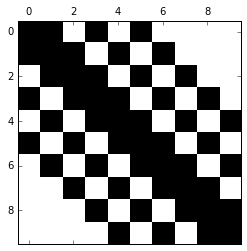

In [30]:
print(fullA)
with open('matrixtest.txt', 'w') as f:
    for _list in fullA:
        for _string in _list:
            #f.seek(0)
            f.write(str(_string) + ' ')
        f.write(str(_string) + '\n')
plt.spy(fullA)

[[ 1.       0.001    0.       0.001    0.       0.001    0.       0.       0.
   0.       0.001  ]
 [ 0.       1.       0.001   -0.       0.001   -0.       0.001    0.       0.
   0.       0.002  ]
 [ 0.       0.       1.       0.001   -0.       0.001   -0.       0.001    0.
   0.       0.003  ]
 [ 0.       0.       0.       1.       0.001   -0.       0.001   -0.       0.001
   0.       0.004  ]
 [ 0.       0.       0.       0.       1.       0.001   -0.       0.001   -0.
   0.001    0.005  ]
 [ 0.       0.       0.       0.       0.       1.       0.001   -0.       0.001
  -0.       0.006  ]
 [ 0.       0.       0.       0.       0.       0.       1.       0.001   -0.
   0.001    0.00699]
 [ 0.       0.       0.       0.       0.       0.       0.       1.       0.001
  -0.       0.00799]
 [ 0.       0.       0.       0.       0.       0.       0.       0.       1.
   0.001    0.00899]
 [ 0.       0.       0.       0.       0.       0.       0.       0.       0.
   1.       0.00999]]


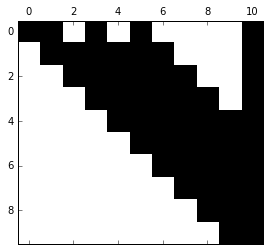

In [18]:
fullB = np.hstack((fullA.copy(), b.copy()))

for i in range(N): 
    fullB[i] = fullB[i] / fullB[i, i] # разделить i-ю строку на диагональный элемент
    for j in range(-1, subK-1, -1): #subD
        if (i-j < N) :
            fullB[i-j] -= fullB[i] * fullB[i-j, i]
print(fullB)
plt.spy(fullB)

In [19]:
# обратный ход
x = np.zeros((N, 1))
x[N-1] = fullB[N-1,N] # вычисление последнего неизвестного
for j in range(N-2,-1,-1):
    l = min([N-j, ovrK+1])
    x[j] = (fullB[j,N] - np.dot(fullB[j,j+1:j+l],x[j+1:j+l]))
    #x[j] = (fullB[j,N] - np.dot(fullB[j,j+1:N],x[j+1:]))
print(x.T)

[[ 0.00099  0.00198  0.00298  0.00398  0.00497  0.00598  0.00698  0.00798
   0.00898  0.00999]]


In [20]:
xg = np.linalg.solve(fullA, b)
print(xg.T)

[[ 0.00099  0.00198  0.00298  0.00398  0.00497  0.00598  0.00698  0.00798
   0.00898  0.00999]]


In [21]:
np.linalg.norm(x - xg)

1.5178830414797062e-18

# Решение для компактной матрицы

In [43]:
filled

{-1: 1, 0: 1000, 1: 1, 3: 1, 5: 1}

In [44]:
# заполнение компактной матрицы (N, K)
A = np.zeros((N, K))
for i in di:
    j = i + np.abs(subK)
    if i <= 0:
        A[-i:, j] = filled[i]
    else:
        A[:-i, j] = filled[i]

[[    0.  1000.     1.     0.     1.     0.     1.]
 [    1.  1000.     1.     0.     1.     0.     1.]
 [    1.  1000.     1.     0.     1.     0.     1.]
 [    1.  1000.     1.     0.     1.     0.     1.]
 [    1.  1000.     1.     0.     1.     0.     1.]
 [    1.  1000.     1.     0.     1.     0.     0.]
 [    1.  1000.     1.     0.     1.     0.     0.]
 [    1.  1000.     1.     0.     0.     0.     0.]
 [    1.  1000.     1.     0.     0.     0.     0.]
 [    1.  1000.     0.     0.     0.     0.     0.]]


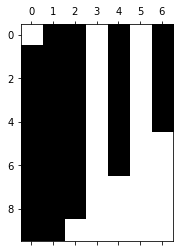

In [45]:
print(A)
plt.spy(A)

In [46]:
b = np.float64(np.array(range(1,N+1))[:,np.newaxis])
b.T

array([[  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]])

In [47]:
# индекс главной диагонали
maind = -subK
maind

1

[[ 0.     1.     0.001  0.     0.001  0.     0.001]
 [ 0.     1.     0.001 -0.     0.001 -0.     0.001]
 [ 0.     1.     0.001 -0.     0.001 -0.     0.001]
 [ 0.     1.     0.001 -0.     0.001 -0.     0.001]
 [ 0.     1.     0.001 -0.     0.001 -0.     0.001]
 [ 0.     1.     0.001 -0.     0.001 -0.     0.   ]
 [ 0.     1.     0.001 -0.     0.001  0.     0.   ]
 [ 0.     1.     0.001 -0.     0.     0.     0.   ]
 [ 0.     1.     0.001  0.     0.     0.     0.   ]
 [ 0.     1.     0.     0.     0.     0.     0.   ]]
[[ 0.001  ]
 [ 0.002  ]
 [ 0.003  ]
 [ 0.004  ]
 [ 0.005  ]
 [ 0.006  ]
 [ 0.00699]
 [ 0.00799]
 [ 0.00899]
 [ 0.00999]]


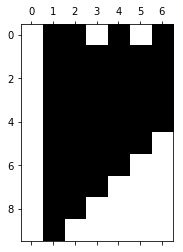

In [48]:
B = A.copy()
d = b.copy()
for i in range(N): 
    Bii = B[i, maind].copy()
    B[i] = B[i] / Bii # разделить i-ю строку на диагональный элемент
    d[i] = d[i] / Bii
    for j in range(-1, subK-1, -1): # исключение i-й неизвестной из всех уравнений ниже (их -subK штук)
        if (i-j < N):
            Bij = B[i-j, maind+j].copy()
            B[i-j, maind+j:j] -= B[i, maind:] * Bij
            d[i-j] -= d[i] * Bij
print(B)
plt.spy(B)
print(d)

[[ 0.     1.     0.001  0.     0.001  0.     0.001]
 [ 0.     1.     0.001 -0.     0.001 -0.     0.001]
 [ 0.     1.     0.001 -0.     0.001 -0.     0.001]
 [ 0.     1.     0.001 -0.     0.001 -0.     0.001]
 [ 0.     1.     0.001 -0.     0.001 -0.     0.001]
 [ 0.     1.     0.001 -0.     0.001 -0.     0.   ]
 [ 0.     1.     0.001 -0.     0.001  0.     0.   ]
 [ 0.     1.     0.001 -0.     0.     0.     0.   ]
 [ 0.     1.     0.001  0.     0.     0.     0.   ]
 [ 0.     1.     0.     0.     0.     0.     0.   ]]
[[ 0.001  ]
 [ 0.002  ]
 [ 0.003  ]
 [ 0.004  ]
 [ 0.005  ]
 [ 0.006  ]
 [ 0.00699]
 [ 0.00799]
 [ 0.00899]
 [ 0.00999]]


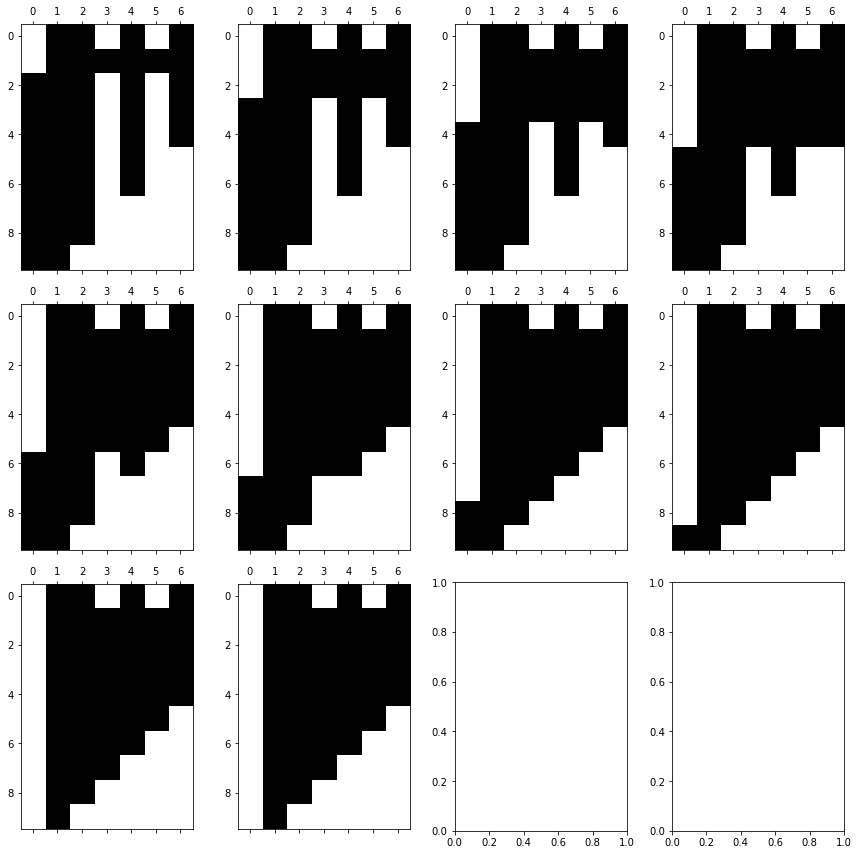

In [49]:
# вариант с roll
B = A.copy()
d = b.copy()
fig, ax = plt.subplots(N // 4 + 1, 4)
fig.set_size_inches(12, 12)
for i in range(N): 
    Bii = B[i, maind].copy()
    B[i] = B[i] / Bii # разделить i-ю строку на диагональный элемент
    d[i] = d[i] / Bii
    for j in range(-1, subK-1, -1): # исключение i-й неизвестной из всех уравнений ниже (их -subK штук)
        if (i-j < N):
            Bij = B[i-j, maind+j].copy()
            B[i-j] -= np.roll(B[i], j) * Bij
            d[i-j] -= d[i] * Bij
    ax[i//4, i%4].spy(B)
    ax[i//4, i%4].set_aspect('equal')


fig.tight_layout()
print(B)
print(d)

In [50]:
# обратный ход
x = np.zeros((N, 1))
x[N-1] = d[N-1] # вычисление последнего неизвестного
for j in range(N-2,-1,-1):
    l = min([N-j, ovrK+1])
    #print(l)
    x[j] = d[j] - np.dot(B[j,maind+1:maind+l],x[j+1:j+l])
print(x.T)

[[ 0.00099  0.00198  0.00298  0.00398  0.00497  0.00598  0.00698  0.00798
   0.00898  0.00999]]


In [51]:
xg = np.linalg.solve(fullA, b)
print(xg.T)

[[ 0.00099  0.00198  0.00298  0.00398  0.00497  0.00598  0.00698  0.00798
   0.00898  0.00999]]


In [52]:
np.linalg.norm(xg - x)

1.5178830414797062e-18